In [142]:
import pandas as pd
import matplotlib.pyplot as plt

In [145]:
"""
returns percentage of authors and editors that are male as a dictionary
"""
def gender_plot(author_data, editor_names, editor_genders, year):
    authors = pd.read_csv(author_data).drop(labels=['Unnamed: 0', 'PaperTitle', 'OnlineDate', 'JournalId', 
                                                    'OriginalVenue', 'CreatedDate'], axis=1)
    editors = pd.read_csv(editor_names, names=["Editor", "Role", "x", "y", "z"])
    editor_genders = pd.read_csv(editor_genders, names=["Editor", "Gender", "Probability"])
    
    authors = authors[authors['Year'] == year]
    author_gender_percentage = -1
    if len(authors) > 0:
        author_genders = authors[authors['GenderProbability'] >= 0.90]
        author_gender_percentage = (author_genders['Gender'].value_counts() / len(author_genders))
        if 'male' in author_gender_percentage:
            author_gender_percentage = author_gender_percentage['male']
        else:
            author_gender_percentage = 0

    editors = editors.join(editor_genders.set_index('Editor'), on=['Editor'], how='left')
    editor_gender_percentage = -1
    if len(editors) > 0:
        editors = editors[editors['Probability'] >= 0.90]
        editor_gender_percentage = (editors['Gender'].value_counts() / len(editors))
        if 'male' in editor_gender_percentage:
            editor_gender_percentage = editor_gender_percentage['male']
        else:
            editor_gender_percentage = 0
        
    return {"author": float( '%.3f'%(author_gender_percentage)), 
            "editor": float( '%.3f'%(editor_gender_percentage))}

In [143]:
"""
gets aggregate results across all available years for a journal
"""
def call_gender_plot(journal, start, end, magic):
    aggregate = {}
    for i in range(start, end+1):
        res = gender_plot(f"../author_data/gender/{journal}_authors_genderize.csv", 
                          f"../editor_data/extracted_names/{journal}/{journal}.{i}.extracted.txt", 
                          f"../editor_data/analysis/genderize/{journal}.genderize.aggregate.csv", magic+i)
        aggregate[magic+i] = res
    return aggregate

In [121]:
aer_gender = call_gender_plot("aer", 84, 113, 1910)
eco_gender = call_gender_plot("eco", 75, 91, 1932)
jpe_gender = call_gender_plot("jpe", 125, 131, 1892)
qje_gender = call_gender_plot("qje", 109, 138, 1885)
res_gender = call_gender_plot("res", 61, 90, 1933)

In [141]:
def plot_gender(journal, data):
    years = sorted(data.keys())
    authors = []
    editors = []
    for year in years:
        if data[year]['author'] == -1:
            authors.append(0)
        else:
            authors.append(1-data[year]['author'])
        if data[year]['editor'] == -1:
            editors.append(0)
        else:
            editors.append(1-data[year]['editor'])
    
    axes = plt.axes()
    axes.set_ylim([0, 1])
    plt.plot(years, authors, label='authors')
    plt.plot(years, editors, label='editors')
    plt.title(f'Percentage of Female Contributors at {journal.upper()}')
    plt.xticks(years, rotation=90)
    plt.legend()
    plt.show()

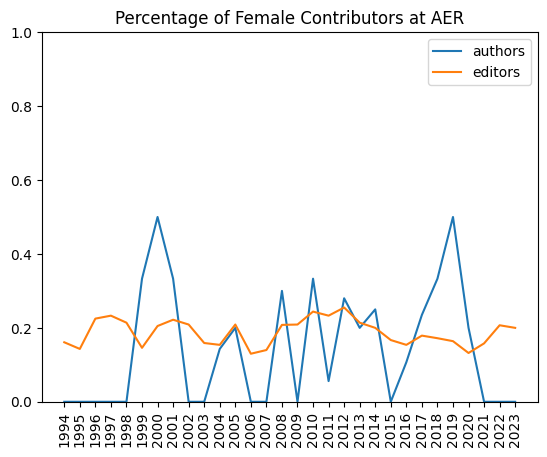

In [136]:
plot_gender("aer", aer_gender)

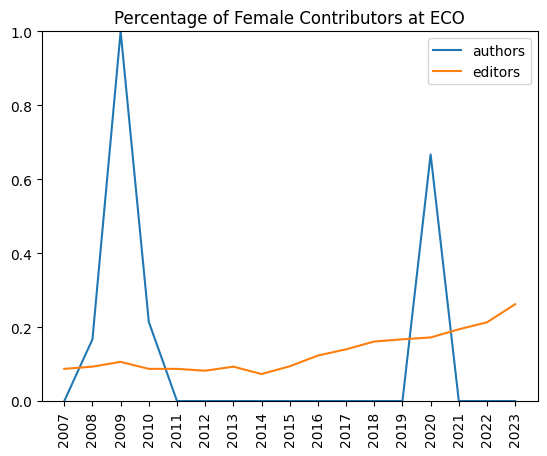

In [137]:
plot_gender("eco", eco_gender)

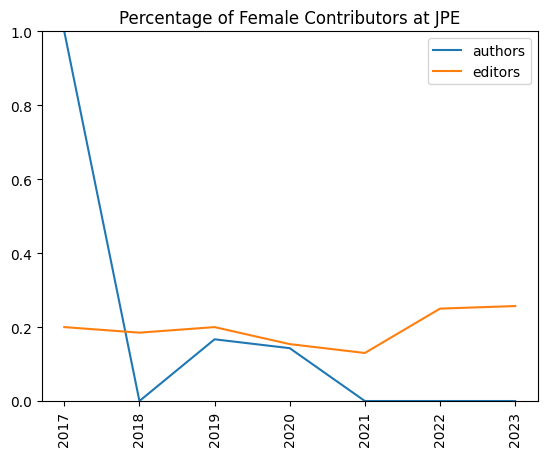

In [138]:
plot_gender("jpe", jpe_gender)

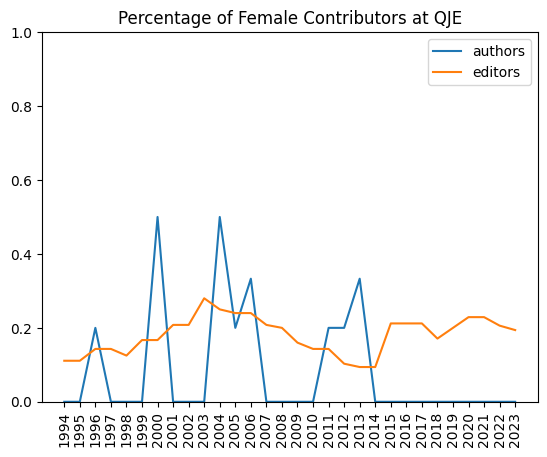

In [139]:
plot_gender("qje", qje_gender)

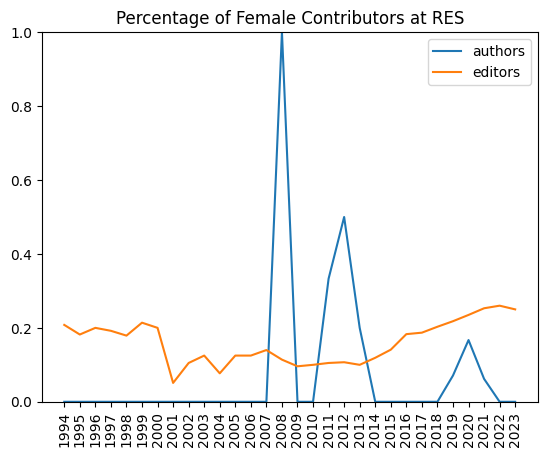

In [140]:
plot_gender("res", res_gender)